<a href="https://colab.research.google.com/github/dan-manolescu/data-structures-fun/blob/main/C6_Heaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Priority Queues and Heaps**

## Max Heap

In [216]:
from typing import Any

class Heap:
    def __init__(self, size: int, is_min_heap: bool = False):
        self.array_size = size + 1
        self.array = [None] * self.array_size
        self.last_index = 0
        self.is_min_heap = is_min_heap

    def HeapInsert(self, value: Any) -> None:
        if self.last_index == self.array_size - 1:
            # increase heap-size by doubling the array.
            self.array_size *= 2
            self.array += [None] * self.array_size

        self.last_index += 1
        self.array[self.last_index] = value

        # swap the new node up the heap.
        current = self.last_index
        parent = current // 2
        while (parent >= 1 and
                ((not self.is_min_heap and self.array[parent] < self.array[current])
                or (self.is_min_heap and self.array[parent] > self.array[current]))):
            self.array[parent], self.array[current] = self.array[current], self.array[parent]
            current = parent
            parent = current // 2

    def HeapRemove(self) -> Any | None:
        if self.last_index == 0:
            return None

        # swap out the root for the last element and shrink the heap.
        # remember that the heap array always starts at position 1.
        result = self.array[1]
        self.array[1] = self.array[self.last_index]
        self.array[self.last_index] = None
        self.last_index -= 1

        # bubble the new root down.
        i = 1
        while i <= self.last_index:
            swap = i
            # need to ensure we compare the value to an existing child.
            if (2 * i <= self.last_index and
                    ((not self.is_min_heap and self.array[swap] < self.array[2 * i])
                    or (self.is_min_heap and self.array[swap] > self.array[2 * i]))):
                swap = 2 * i
            if (2 * i + 1 <= self.last_index and
                    ((not self.is_min_heap and self.array[swap] < self.array[2*i + 1])
                    or (self.is_min_heap and self.array[swap] > self.array[2*i + 1]))):
                swap = 2 * i + 1

            # swap with the larger child if necessary:
            if i != swap:
                self.array[i], self.array[swap] = self.array[swap], self.array[i]
                i = swap
            else:
                # we've gone an iteration without a swap so stop.
                break

        return result


In [217]:
import graphviz

def visualize_heap(heap: Heap, special_value: Any = None) -> graphviz.Digraph:
    dot = graphviz.Digraph()
    special_attr = {'style': 'filled', 'color':'lightgrey'}

    def add_heap_nodes(index: int) -> None:
        if 2 * index <= heap.last_index:
            dot.node(str(heap.array[2 * index])) if heap.array[2 * index] != special_value else dot.node(str(heap.array[2 * index]), **special_attr)
            dot.edge(str(heap.array[index]), str(heap.array[2 * index]))
            add_heap_nodes(2 * index)
        if 2 * index + 1 <= heap.last_index:
            dot.node(str(heap.array[2 * index + 1])) if heap.array[2 * index + 1] != special_value else dot.node(str(heap.array[2 * index + 1]), **special_attr)
            dot.edge(str(heap.array[index]), str(heap.array[2 * index + 1]))
            add_heap_nodes(2 * index + 1)

    if heap.last_index > 0:
        dot.node(str(heap.array[1])) if heap.array[1] != special_value else dot.node(str(heap.array[1]), **special_attr)
        add_heap_nodes(1)

    return dot


### Some tests with Heap class

In [218]:
heap = Heap(10)
heap.HeapInsert(98)
heap.HeapInsert(95)
heap.HeapInsert(50)
heap.HeapInsert(10)
heap.HeapInsert(17)
heap.HeapInsert(23)

Before inserting value 85

In [219]:
heap.array

[None, 98, 95, 50, 10, 17, 23, None, None, None, None]

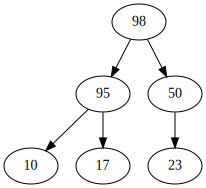

In [220]:
visualize_heap(heap)

After inserting value 85

In [221]:
heap.HeapInsert(85)
heap.array

[None, 98, 95, 85, 10, 17, 23, 50, None, None, None]

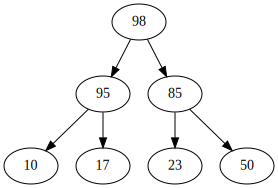

In [222]:
visualize_heap(heap)

In [223]:
heap = Heap(10)
heap.HeapInsert(98)
heap.HeapInsert(95)
heap.HeapInsert(50)
heap.HeapInsert(10)
heap.HeapInsert(17)
heap.HeapInsert(23)

Before removing top value

In [224]:
heap.array

[None, 98, 95, 50, 10, 17, 23, None, None, None, None]

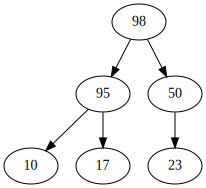

In [225]:
visualize_heap(heap)

After removing top value

In [226]:
heap.HeapRemove()
heap.array

[None, 95, 23, 50, 10, 17, None, None, None, None, None]

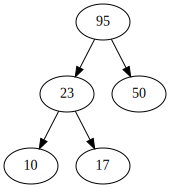

In [227]:
visualize_heap(heap)

### Min Heap tests

In [228]:
heap = Heap(10, True)
heap.HeapInsert(98)
heap.HeapInsert(95)
heap.HeapInsert(50)
heap.HeapInsert(10)
heap.HeapInsert(17)
heap.HeapInsert(23)

Before inserting new value into min heap

In [229]:
heap.array

[None, 10, 17, 23, 98, 50, 95, None, None, None, None]

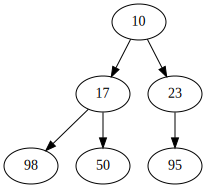

In [230]:
visualize_heap(heap)

After inserting new value into min heap

In [231]:
heap.HeapInsert(85)
heap.array

[None, 10, 17, 23, 98, 50, 95, 85, None, None, None]

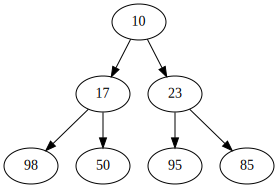

In [232]:
visualize_heap(heap)

In [233]:
heap = Heap(10, True)
heap.HeapInsert(98)
heap.HeapInsert(95)
heap.HeapInsert(50)
heap.HeapInsert(10)
heap.HeapInsert(17)
heap.HeapInsert(23)

Before removing top value from min heap

In [234]:
heap.array

[None, 10, 17, 23, 98, 50, 95, None, None, None, None]

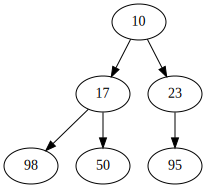

In [235]:
visualize_heap(heap)

After removing top value from min heap

In [236]:
heap.HeapRemove()
heap.array

[None, 17, 50, 23, 98, 95, None, None, None, None, None]

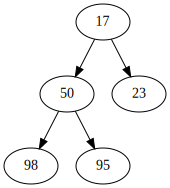

In [237]:
visualize_heap(heap)

## Heapsort algorithm

In [238]:
from typing import List

def Heapsort(unsorted: List, reverse: bool = False) -> List:
    N = len(unsorted)
    tmp_heap = Heap(N, not reverse)
    result = [None] * N

    # insert each item in the unsorted array into a heap.
    for i in unsorted:
        tmp_heap.HeapInsert(i)

    # remove every max element and add it to the result list.
    for j in range(N):
        result[j] = tmp_heap.HeapRemove()

    return result

In [239]:
unsorted_array = [46, 35, 9, 28, 61, 8, 38, 40]
Heapsort(unsorted_array)

[8, 9, 28, 35, 38, 40, 46, 61]

In [240]:
Heapsort(unsorted_array, True)

[61, 46, 40, 38, 35, 28, 9, 8]

### Heapsort function with debug output

In [241]:
from IPython.display import display

def HeapsortDebug(unsorted: List, reverse: bool = False) -> List:
    N = len(unsorted)
    tmp_heap = Heap(N, not reverse)
    result = [None] * N

    # insert each item in the unsorted array into a heap.
    for i in unsorted:
        tmp_heap.HeapInsert(i)
        print(f'Added value {i} to heap')
        display(visualize_heap(tmp_heap, i))

    # remove every max element and add it to the result list.
    for j in range(N):
        result[j] = tmp_heap.HeapRemove()
        print(f'Result array is now: {result}, while heap is now:')
        display(visualize_heap(tmp_heap))

    return result

Added value 46 to heap


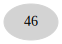

Added value 35 to heap


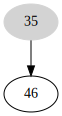

Added value 9 to heap


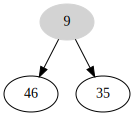

Added value 28 to heap


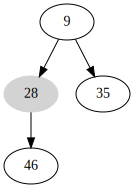

Added value 61 to heap


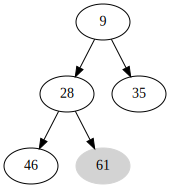

Added value 8 to heap


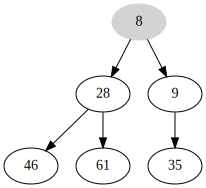

Added value 38 to heap


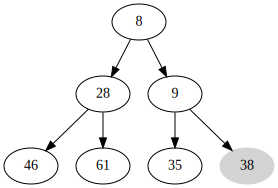

Added value 40 to heap


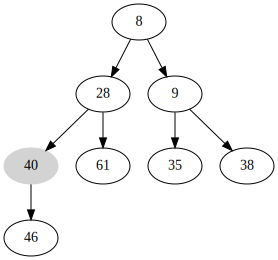

Result array is now: [8, None, None, None, None, None, None, None], while heap is now:


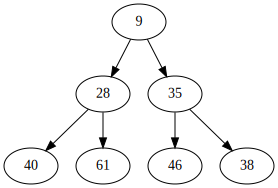

Result array is now: [8, 9, None, None, None, None, None, None], while heap is now:


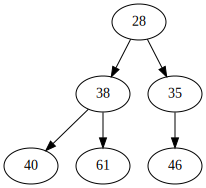

Result array is now: [8, 9, 28, None, None, None, None, None], while heap is now:


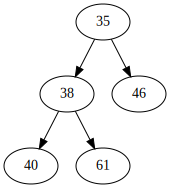

Result array is now: [8, 9, 28, 35, None, None, None, None], while heap is now:


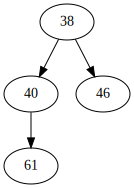

Result array is now: [8, 9, 28, 35, 38, None, None, None], while heap is now:


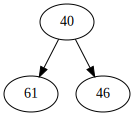

Result array is now: [8, 9, 28, 35, 38, 40, None, None], while heap is now:


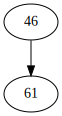

Result array is now: [8, 9, 28, 35, 38, 40, 46, None], while heap is now:


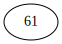

Result array is now: [8, 9, 28, 35, 38, 40, 46, 61], while heap is now:


[8, 9, 28, 35, 38, 40, 46, 61]

In [242]:
unsorted_array = [46, 35, 9, 28, 61, 8, 38, 40]
HeapsortDebug(unsorted_array)